In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/pot_car_onio_carTribe.csv")
#vegi_df = vegi_df.drop(columns="Unnamed: 0")
vegi_df = df.rename({'Unnamed: 0': 'Index'}, axis=1)
vegi_df.head()

,Index,Hight,Width,R,G,B,green pixels,Label
0,0,193,78,141,117,91,0,Kartoffel
1,1,139,55,143,111,70,0,Kartoffel
2,2,159,61,143,113,76,0,Kartoffel
3,3,144,92,126,97,66,0,Kartoffel
4,4,114,91,141,113,78,0,Kartoffel


In [73]:
vegi_df.shape

(873, 8)

In [31]:
vegi_df['Label'].unique()

array(['Kartoffel', 'Karotte', 'Zwiebel', 'Karotte_Trieb'], dtype=object)

In [74]:
karotte_trieb_df = vegi_df.loc[vegi_df['Label'] == "Karotte_Trieb"]
karotte_trieb_df.head(20)

,Index,Hight,Width,R,G,B,green pixels,Label
654,654,217,199,113,109,71,3671,Karotte_Trieb
655,655,280,93,151,128,83,864,Karotte_Trieb
656,656,254,73,151,130,89,349,Karotte_Trieb
657,657,262,111,149,130,92,440,Karotte_Trieb
658,658,265,70,146,127,85,470,Karotte_Trieb
659,659,267,71,150,130,87,481,Karotte_Trieb
660,660,265,72,159,130,83,99,Karotte_Trieb
661,661,255,120,103,107,67,2218,Karotte_Trieb
662,662,254,120,117,99,69,2134,Karotte_Trieb
663,663,254,74,131,98,75,336,Karotte_Trieb


In [32]:
green_pixels_df = vegi_df.loc[(vegi_df['green pixels'] > 0) & (vegi_df['Label'] != "Karotte_Trieb")]
display(green_pixels_df.head())
display(green_pixels_df.info())
display(green_pixels_df.describe().T)

,Index,Hight,Width,R,G,B,green pixels,Label
84,84,183,120,123,100,55,174,Kartoffel
85,85,148,129,124,100,53,31,Kartoffel
95,95,158,130,118,96,77,318,Kartoffel
96,96,147,125,118,95,75,272,Kartoffel
97,97,183,127,115,91,69,490,Kartoffel


<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 84 to 553
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         102 non-null    int64 
 1   Hight         102 non-null    int64 
 2   Width         102 non-null    int64 
 3   R             102 non-null    int64 
 4   G             102 non-null    int64 
 5   B             102 non-null    int64 
 6   green pixels  102 non-null    int64 
 7   Label         102 non-null    object
dtypes: int64(7), object(1)
memory usage: 7.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
Index,102.0,389.539216,135.952938,84.0,323.25,382.5,519.75,553.0
Hight,102.0,182.568627,53.445357,111.0,135.00,166.0,237.00,282.0
Width,102.0,93.019608,28.888649,47.0,65.00,92.0,115.75,191.0
R,102.0,97.147059,22.949966,65.0,79.00,88.0,119.75,143.0
G,102.0,73.892157,22.165403,40.0,56.00,65.5,92.50,132.0
B,102.0,62.225490,9.908399,37.0,56.00,60.5,69.00,92.0
green pixels,102.0,166.715686,213.411255,1.0,17.50,106.5,201.75,1041.0


In [77]:
karotte_trieb_df

,Index,Hight,Width,R,G,B,green pixels,Label
654,654,217,199,113,109,71,3671,Karotte_Trieb
655,655,280,93,151,128,83,864,Karotte_Trieb
656,656,254,73,151,130,89,349,Karotte_Trieb
657,657,262,111,149,130,92,440,Karotte_Trieb
658,658,265,70,146,127,85,470,Karotte_Trieb
...,...,...,...,...,...,...,...,...
868,868,254,240,100,95,57,10638,Karotte_Trieb
869,869,312,184,86,83,43,6540,Karotte_Trieb
870,870,255,144,129,108,78,1126,Karotte_Trieb
871,871,283,185,106,95,55,5837,Karotte_Trieb


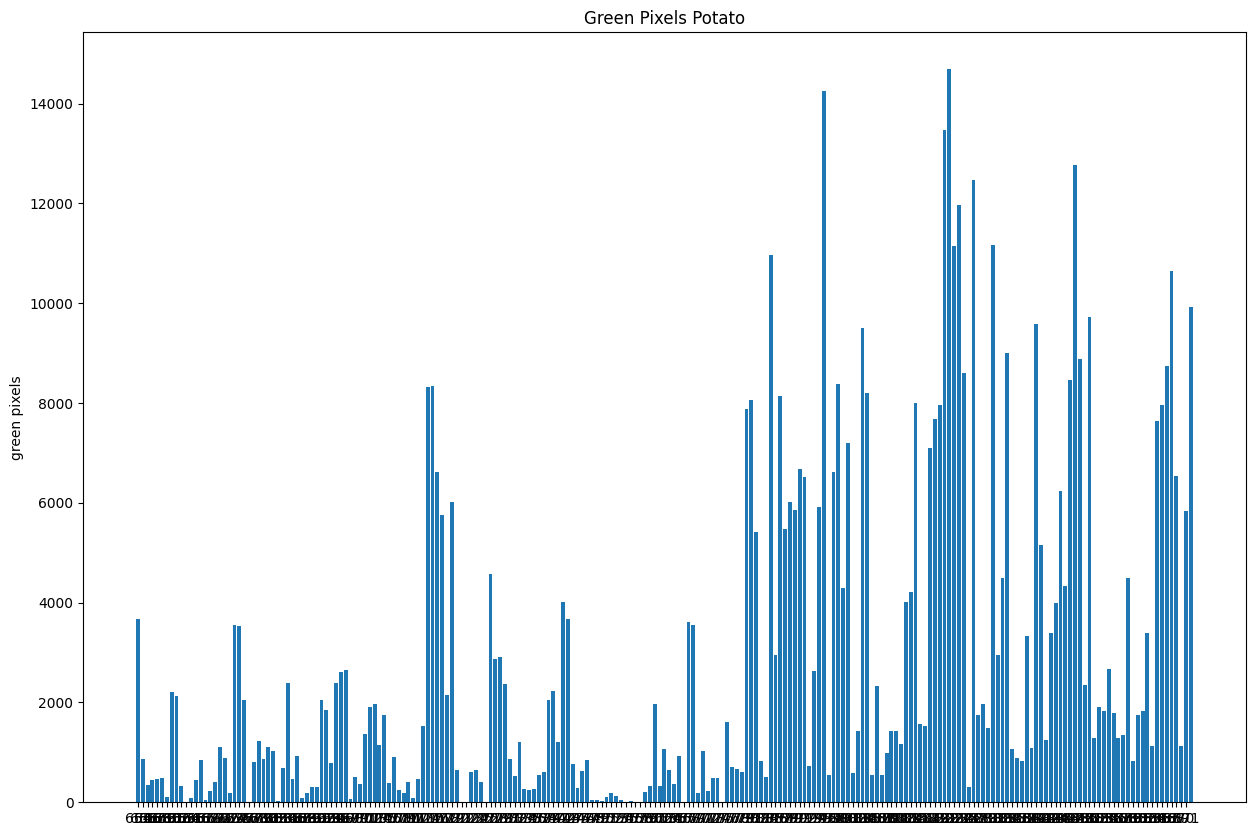

In [82]:
pix_trieb = karotte_trieb_df['green pixels'].to_list()
idx_trieb = karotte_trieb_df['Index'].to_list()

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(idx_trieb, pix_trieb, label=[str(i) for i in idx_trieb])
ax.set_ylabel('green pixels')
ax.set_title("Green Pixels Potato")
ax.set_xticks(np.arange(idx_trieb[0],idx_trieb[-1], 1))
plt.show()

In [40]:
pix_potato = green_pixels_df.loc[green_pixels_df['Label'] == "Kartoffel", 'green pixels'].to_list()
idx_potato = green_pixels_df.loc[green_pixels_df['Label'] == "Kartoffel", 'Index'].to_list()
pix_carrot = green_pixels_df.loc[green_pixels_df['Label'] == "Karotte", 'green pixels'].to_list()
idx_carrot = green_pixels_df.loc[green_pixels_df['Label'] == "Karotte", 'Index'].to_list()
pix_onion = green_pixels_df.loc[green_pixels_df['Label'] == "Zwiebel", 'green pixels'].to_list()
idx_onion = green_pixels_df.loc[green_pixels_df['Label'] == "Zwiebel", 'Index'].to_list()

print(pix_potato)
print(idx_potato)
print(pix_carrot)
print(idx_carrot)
print(pix_onion)
print(idx_onion)

[174, 31, 318, 272, 490, 532, 46, 111, 79, 11, 14]
[84, 85, 95, 96, 97, 98, 99, 100, 101, 103, 104]
51
[278, 279, 282, 283, 289, 290, 291, 298, 299, 300, 305, 306, 315, 320, 323, 324, 327, 329, 331, 332, 336, 344, 345, 350, 351, 353, 354, 355, 357, 358, 359, 362, 370, 371, 372, 373, 379, 380, 381, 382, 383, 384, 385, 386, 389, 390, 391, 393, 396, 397, 398]
[6, 227, 160, 436, 241, 184, 87, 193, 96, 198, 50, 118, 291, 203, 148, 3, 2, 133, 131, 13, 140, 11, 183, 307, 106, 208, 738, 9, 151, 109, 151, 11, 107, 57, 295, 173, 5, 73, 1, 1]
[502, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 546, 547, 552, 553]


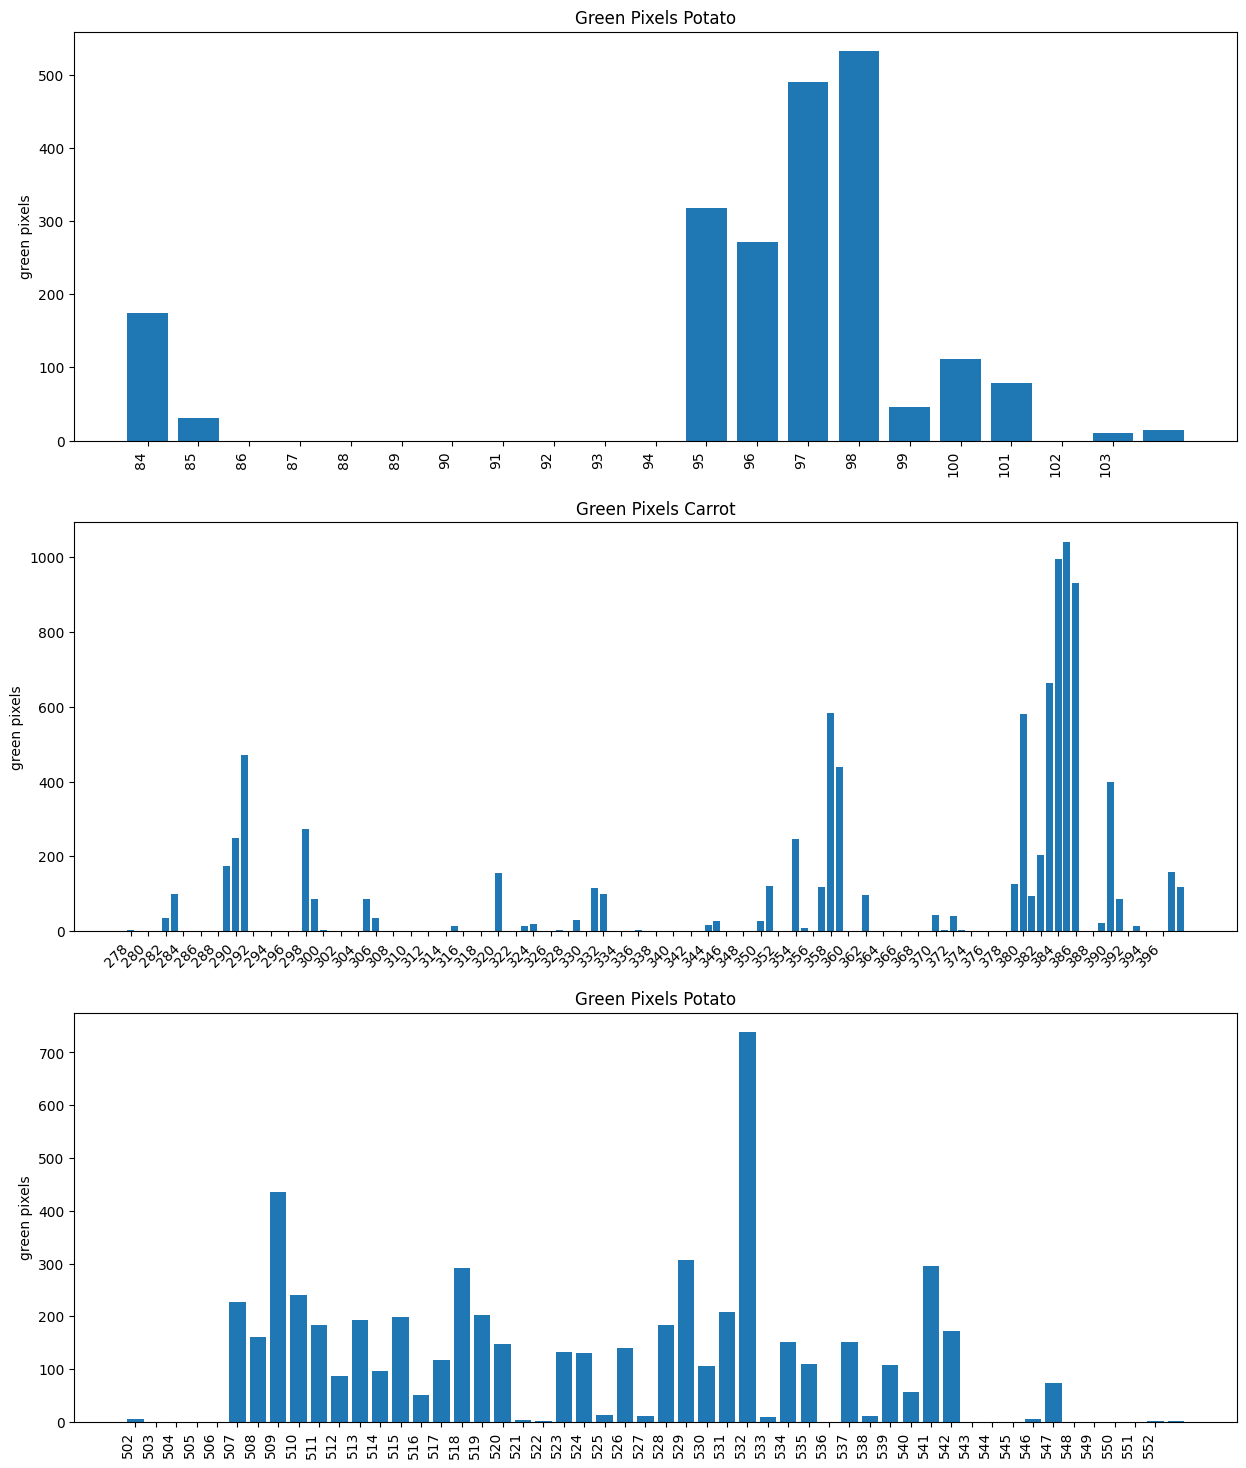

In [70]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
ax[0].bar(idx_potato, pix_potato, label=[str(i) for i in idx_potato])
ax[0].set_ylabel('green pixels')
ax[0].set_title("Green Pixels Potato")
ax[0].set_xticks(np.arange(idx_potato[0],idx_potato[-1], 1))
ax[0].set_xticklabels(np.arange(idx_potato[0],idx_potato[-1], 1), rotation=90, ha='right')

ax[1].bar(idx_carrot, pix_carrot, label=[str(i) for i in idx_carrot])
ax[1].set_ylabel('green pixels')
ax[1].set_title("Green Pixels Carrot")
ax[1].set_xticks(np.arange(idx_carrot[0],idx_carrot[-1], 2))
ax[1].set_xticklabels(np.arange(idx_carrot[0],idx_carrot[-1], 2), rotation=45, ha='right')

ax[2].bar(idx_onion, pix_onion, label=[str(i) for i in idx_onion])
ax[2].set_ylabel('green pixels')
ax[2].set_title("Green Pixels Potato")
ax[2].set_xticks(np.arange(idx_onion[0],idx_onion[-1], 1))
ax[2].set_xticklabels(np.arange(idx_onion[0],idx_onion[-1], 1), rotation=90, ha='right')

plt.subplots_adjust(top = 1.5)
plt.show()


In [36]:
pix_potato = green_pixels_df['green pixels'].to_list()
idx_potato = green_pixels_df['Index'].to_list()
pix_ = green_pixels_df['green pixels'].to_list()
idx_potato = green_pixels_df['Index'].to_list()
pix_potato = green_pixels_df['green pixels'].to_list()
idx_potato = green_pixels_df['Index'].to_list()

[84,
 85,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 278,
 279,
 282,
 283,
 289,
 290,
 291,
 298,
 299,
 300,
 305,
 306,
 315,
 320,
 323,
 324,
 327,
 329,
 331,
 332,
 336,
 344,
 345,
 350,
 351,
 353,
 354,
 355,
 357,
 358,
 359,
 362,
 370,
 371,
 372,
 373,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 389,
 390,
 391,
 393,
 396,
 397,
 398,
 502,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 537,
 538,
 539,
 540,
 541,
 542,
 546,
 547,
 552,
 553]

In [41]:
green_pixels_df['Label'].value_counts()

Label
Karotte      51
Zwiebel      40
Kartoffel    11
Name: count, dtype: int64

In [21]:
data = {'Label': ['A', 'B', 'A', 'C', 'B', 'C'],
        'green pixels': [10, 20, 15, 25, 30, 22]}

df = pd.DataFrame(data)

# Grouping by 'Label' and aggregating 'green pixels' into a list
grouped_df = df.groupby('Label')['green pixels'].agg(list).reset_index()

# Print the result
print(grouped_df)

TypeError: Must provide 'func' or named aggregation **kwargs.

In [34]:
green_pixels_df_grouped = green_pixels_df.groupby(by="Label")["green pixels"].agg(list)
print(green_pixels_df_grouped)

Label
Karotte      [2, 1, 34, 100, 173, 250, 470, 272, 86, 3, 86,...
Kartoffel    [174, 31, 318, 272, 490, 532, 46, 111, 79, 11,...
Zwiebel      [6, 227, 160, 436, 241, 184, 87, 193, 96, 198,...
Name: green pixels, dtype: object
